In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import glob, os, json, pickle
import re

import cv2
# import face_recognition
from imutils import build_montages

In [ ]:
media_fldr = "./data/og_ad_media/*"
media_fps = glob.glob(media_fldr)

# List all our media files by ID
media_dict = {}
for m in media_fps:
    media_name = os.path.basename(m)
    x = media_name.split("_")
    ad_id, media_type = x[0], x[1]
    
    images = []
    videos = []
    
    if "image" in media_type:
        images.append(m)
    else:
        videos.append(m)
    
    if ad_id in media_dict:
        media_dict[ad_id]['images'].extend(images)
        media_dict[ad_id]['videos'].extend(videos)
    else:
        media_dict[ad_id] = {
            "images": images,
            "videos": videos
        }
media_dict["1008372119347745"]
    

In [ ]:
# Find all mentions in images and videos
media_mentions = {}
for k, medias in media_dict.items():
    ims, vids = medias['images'], medias['videos']    
    im_mentions, vid_mentions = [], []
    
    for im in ims:
        im_mentions.append((im, ["Fred"]))
    for vid in vids:
        vid_mentions.append((vid, ['Fred', "Fred2"]))
    
    media_mentions[k] = {
        'images': im_mentions,
        'videos': vid_mentions,
    }
media_mentions["1008372119347745"]

In [ ]:
with open("./output/candidate_face_encodings.json", "r") as f:
    candidate_face_encodings = json.load(f)

known_names = []
known_faces = []
for k, face in candidate_face_encodings.items():
    if face['face_encoding'] is not None:
        known_names.append(k)
        known_faces.append(face['face_encoding'])
        

In [ ]:
import recognize_faces as recog

In [ ]:
recog_faces = recog.FaceRecognizer(known_names, known_faces)
fps = [
    './data/og_ad_media\\1008372119347745_image1.jpg',
    './data/og_ad_media\\1007705609401263_image0.jpg',
    './data/og_ad_media\\1010950745744713_image1.jpg'
]

In [ ]:
for fp in fps:
    rgb_img = recog_faces.read_image_rgb(fp)
    found_faces = recog_faces.name_all_faces(rgb_img, draw_matches=True)
    print(found_faces['face_names'])
    plt.imshow(found_faces['boxed_img'])
    plt.show()

In [ ]:
vid_annot = recog.VideoAnnotator(known_names, known_faces, 5)

In [ ]:
mentions = vid_annot.process_vid("./data/radinovich.mp4", "./data/radinovich_boxed2.avi")

In [ ]:
mentions

In [20]:
leaders = glob.glob('../data/candidate-images/wiki-senate/*00.jpg')

images = []
clean_leaders = []
for l in leaders:
    img = cv2.imread(l)
    if img is not None:
        images.append(img)
        clean_leaders.append(l)
print(len(images))

In [21]:
images = images[:23] + [images[25]]
clean_leaders = clean_leaders[:23] + [clean_leaders[25]]

In [6]:
montage = build_montages(images, (128, 196), (6, 4))[0]

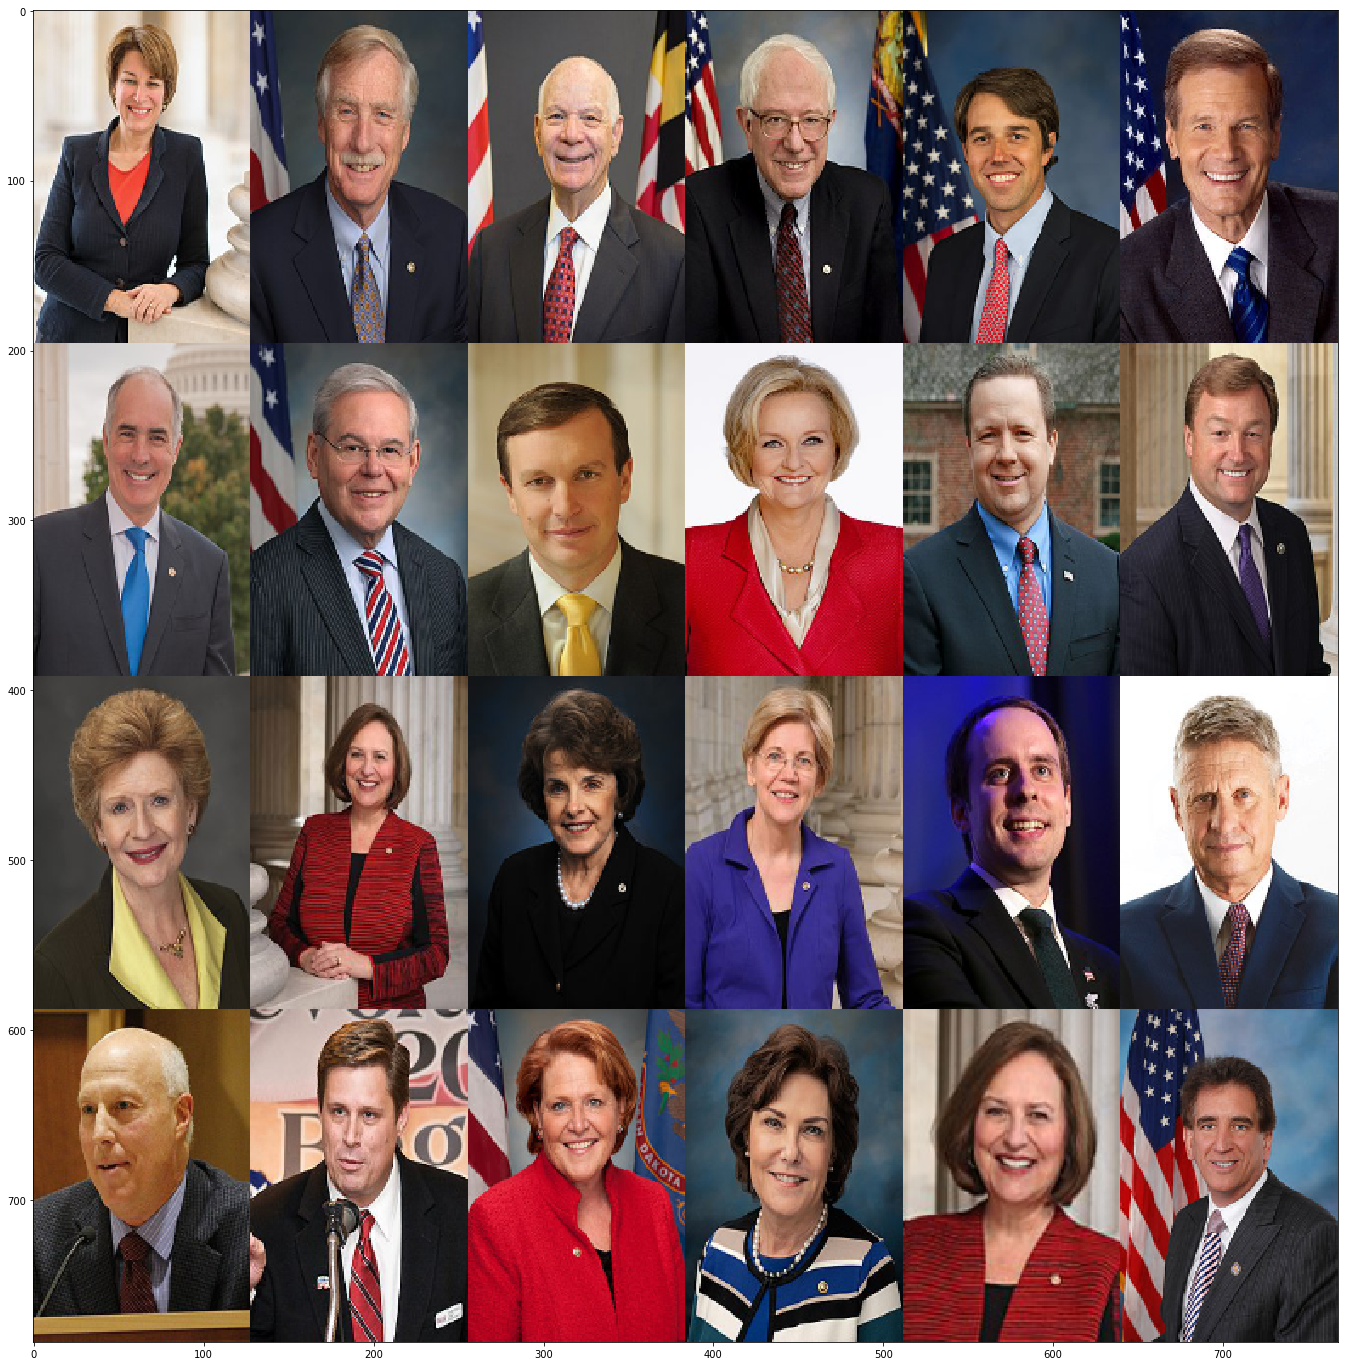

In [7]:
plt.figure(figsize=(640/10, 196/8))
plt.imshow(cv2.cvtColor(montage, cv2.COLOR_BGR2RGB))
plt.savefig('../output/senator-sample.png', bbox_inches='tight')

In [6]:
with open("../output/candidate_face_encodings.json", "r") as f:
    candidate_face_encodings = json.load(f)

known_names = []
known_faces = []
for k, face in candidate_face_encodings.items():
    if face['face_encoding'] is not None:
        known_names.append(k)
        known_faces.append(face['face_encoding'])

In [7]:
import sys
sys.path.insert(0, '../scripts')
import recognize_faces as recog
rec_img = recog.FaceRecognizer(known_names, known_faces)
vid_annot = recog.VideoAnnotator(known_names, known_faces, 5)

C:\Users\fredcorpuz06\Anaconda3\envs\face_recog2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


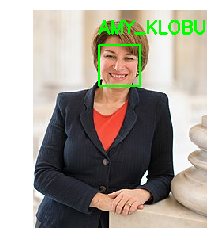

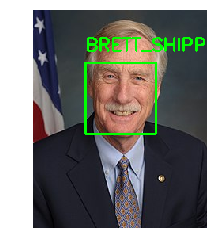

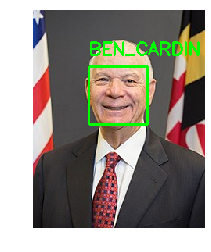

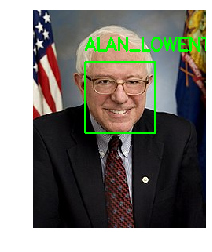

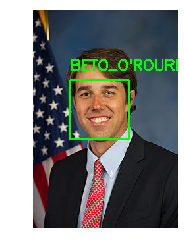

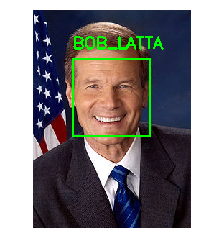

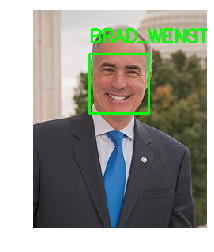

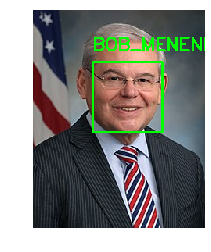

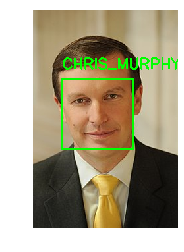

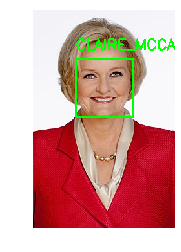

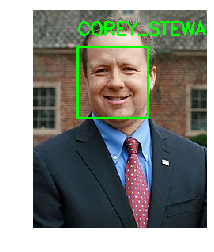

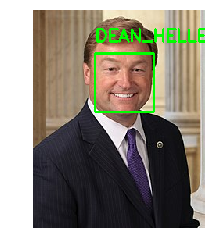

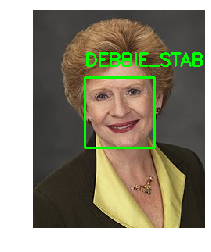

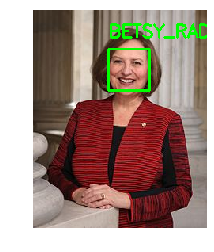

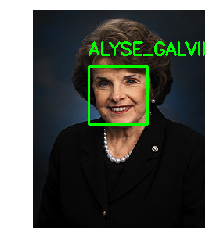

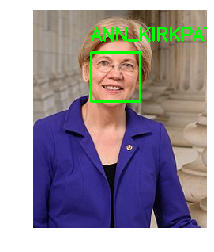

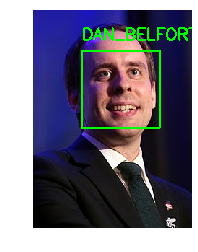

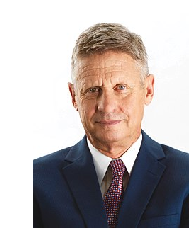

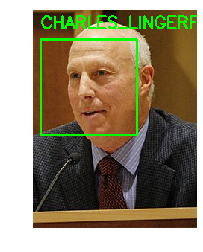

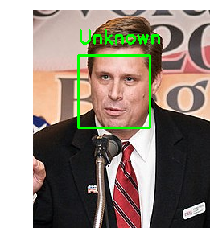

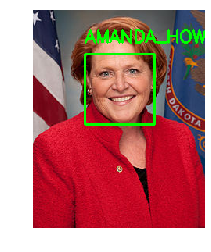

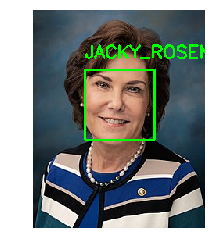

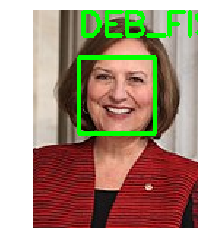

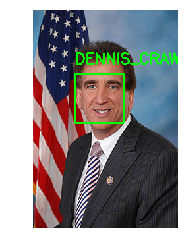

In [36]:
for leader in clean_leaders: 
    rgb_img = rec_img.read_image_rgb(leader)
    found_faces = rec_img.name_all_faces(rgb_img, draw_matches=True)
    _, name = os.path.split(leader)
    fname = f"{name[:-4]}_boxed{name[-4:]}"
    plt.figure()
    plt.imshow(found_faces['boxed_img'], interpolation="nearest")
    plt.axis('off')
    plt.savefig(f"../data/candidate-images/wiki-senate-boxed/{fname}", bbox_inches='tight')

In [3]:
leaders_boxed = glob.glob('../data/candidate-images/wiki-senate-boxed/*.jpg')

images = []

for l in leaders_boxed:
    img = cv2.imread(l)
    if img is not None:
        images.append(img)
print(len(images))

24


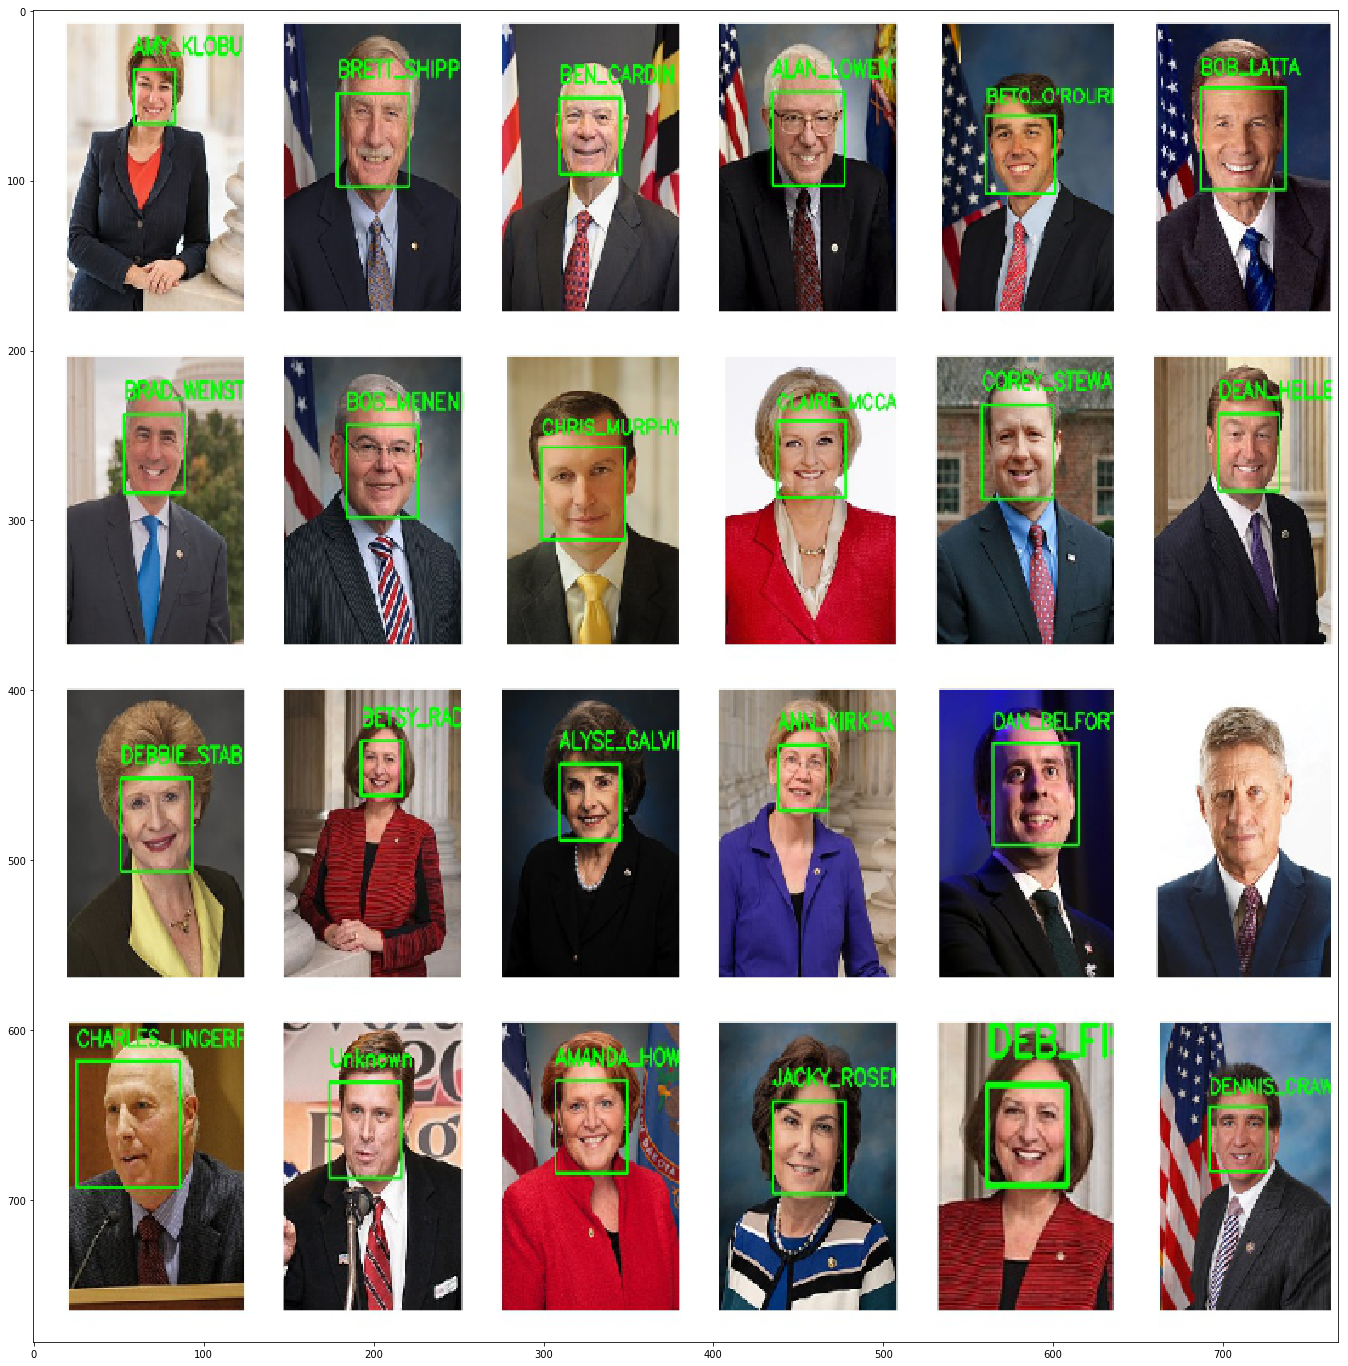

In [4]:
montage = build_montages(images, (128, 196), (6, 4))[0]
plt.figure(figsize=(640/10, 196/8))
plt.imshow(cv2.cvtColor(montage, cv2.COLOR_BGR2RGB))
plt.savefig('../output/senator-sample-boxed.png', bbox_inches='tight')

ballotpedia
wikipedia
votesmart